# ДЗ: Линейная и логистическая регрессия

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.pipeline import make_pipeline, Pipeline

2022-09-21 14:37:35.846427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-21 14:37:35.846458: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-21 14:37:35.874433: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-21 14:37:36.531102: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-21 14:37:36.531179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

#### Fashion MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train = tf.image.resize(X_train[..., np.newaxis], (14, 14))[..., 0]
X_test = tf.image.resize(X_test[..., np.newaxis], (14, 14))[..., 0]

2022-09-21 14:37:37.920405: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-09-21 14:37:37.920439: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: nikolay-desktop
2022-09-21 14:37:37.920448: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: nikolay-desktop
2022-09-21 14:37:37.920536: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 390.154.0
2022-09-21 14:37:37.920563: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 390.154.0
2022-09-21 14:37:37.920572: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 390.154.0


In [4]:
X_train.shape

TensorShape([60000, 14, 14])

In [5]:
X_test.shape

TensorShape([10000, 14, 14])

In [6]:
X_train = X_train[:1000]
y_train = y_train[:1000]

X_test = X_test[:100]
y_test = y_test[:100]

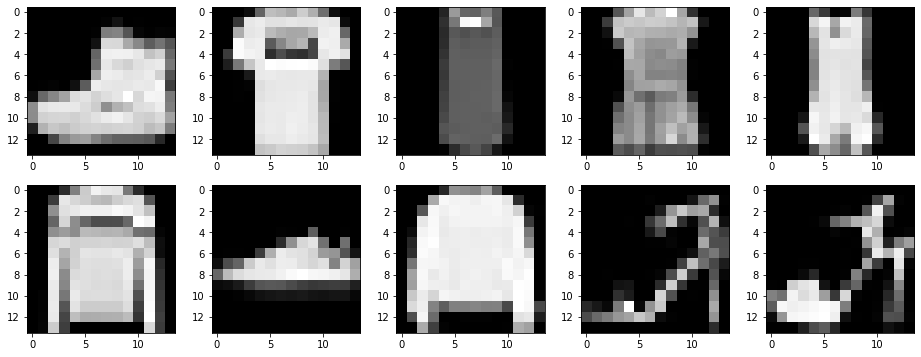

In [7]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i,:], cmap='gray')

In [8]:
X_train = X_train.numpy()
X_test = X_test.numpy()

In [9]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train.shape

(1000, 196)

## Обучение линейной модели

In [10]:
model = make_pipeline(MinMaxScaler(), LogisticRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [11]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Валидация

In [12]:
print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, y_pred_test)}")

Accuracy модели на обучающей выборке 0.924
Accuracy модели на тестовой выборке 0.79


## Улучшение качества с помощью полиномиальной модели

In [13]:
# model2 = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(penalty='elasticnet', l1_ratio=0.1, solver='saga'))
model2 = make_pipeline(MinMaxScaler(), PolynomialCountSketch(degree=2, n_components=300), LogisticRegression())
model2.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialcountsketch',
                 PolynomialCountSketch(n_components=300)),
                ('logisticregression', LogisticRegression())])

In [14]:
y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)

## Валидация

In [15]:
print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, y_pred_train2)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, y_pred_test2)}")

Accuracy модели на обучающей выборке 0.993
Accuracy модели на тестовой выборке 0.82


## Сделайте выводы

Использование полиномиальных признаков для данной задачи не приводит к улучшению достоверности получаемых результатов: модель логистической регресси с полиномиальными признаками склонна к переобучению.